# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [1]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = None, names = columns, skiprows=1)) # added skiprows parameter to skip header line


# Get X and Y

Create the features data frame and target data.

In [2]:
X = fires_dt.drop(columns = 'area')
Y = fires_dt['area']

numeric_columns = ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']

class_columns = ['coord_x', 'coord_y', 'month', 'day']

In [3]:
fires_dt.temp.describe()

count    517.000000
mean      18.889168
std        5.806625
min        2.200000
25%       15.500000
50%       19.300000
75%       22.800000
max       33.300000
Name: temp, dtype: float64

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler

# preprocessor 1
preproc1 = ColumnTransformer(
    transformers = [
        #('scaling', StandardScaler(), numeric_columns),
        #('scaling', MinMaxScaler(), numeric_columns),
        ('scaling', RobustScaler(), numeric_columns),
        ('onehot', OneHotEncoder(handle_unknown = 'infrequent_if_exist'), class_columns)
    ]
)



### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [5]:
# preproc2
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, KernelCenterer, SplineTransformer, PolynomialFeatures

trans_columns = ['temp', 'rh', 'wind']
preproc2 = ColumnTransformer(
    transformers = [
         ('scaling', RobustScaler(), numeric_columns),
         #('quantile_transformer', QuantileTransformer(n_quantiles = 50, random_state = 27), trans_columns),
         #('power_transformer', PowerTransformer(), trans_columns ),
         #('kernel_centerer', KernelCenterer(), trans_columns),
         ('spline_transfomrer', SplineTransformer(), trans_columns),
         #('polynomial', PolynomialFeatures(), trans_columns),
         ('onehot', OneHotEncoder(handle_unknown = 'infrequent_if_exist'), class_columns)
    ]
)

In [6]:
preproc2

ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                 ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh',
                                  'wind', 'rain']),
                                ('spline_transfomrer', SplineTransformer(),
                                 ['temp', 'rh', 'wind']),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                 ['coord_x', 'coord_y', 'month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [7]:
# Pipeline A = preproc1 + baseline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

pipeline_A = Pipeline([
    ('preprocessing', preproc1),
    #('regressor', LinearRegression())
    ('k_nearest', KNeighborsRegressor())
])


In [8]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

#scoring_metric = 'explained_variance'
#scoring_metric = 'max_error'
scoring_metric = 'neg_mean_absolute_error'
#scoring_metric = 'neg_root_mean_squared_error'
scores = ['explained_variance', 'max_error', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

# res_simple_dict_A = cross_validate(pipeline_A, X, Y, scoring = scoring_metric, cv =5)
res_simple_dict_A = cross_validate(pipeline_A, X, Y, scoring = scores, cv =5)
res_simple_A = pd.DataFrame(res_simple_dict_A).mean()
pd.DataFrame(res_simple_A).transpose()

,fit_time,score_time,test_explained_variance,test_max_error,test_neg_mean_absolute_error,test_neg_root_mean_squared_error
0,0.007929,0.005441,-8.936635,-508.5244,-25.099827,-68.669852


In [9]:
# Pipeline B = preproc2 + baseline
pipeline_B = Pipeline([
    ('preprocessing', preproc2),
    #('k_nearest', KNeighborsRegressor())
    ('regressor', LinearRegression())
])

In [10]:
pipeline_B

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                                  ['ffmc', 'dmc', 'dc', 'isi',
                                                   'temp', 'rh', 'wind',
                                                   'rain']),
                                                 ('spline_transfomrer',
                                                  SplineTransformer(),
                                                  ['temp', 'rh', 'wind']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['coord_x', 'coord_y',
                                                   'month', 'day'])])),
                ('regressor', LinearRegression())])

In [11]:
res_simple_dict_B = cross_validate(pipeline_B, X, Y, scoring = scores, cv =5)

res_simple_B = pd.DataFrame(res_simple_dict_B).mean()
pd.DataFrame(res_simple_B).transpose()

,fit_time,score_time,test_explained_variance,test_max_error,test_neg_mean_absolute_error,test_neg_root_mean_squared_error
0,0.017172,0.004759,-3.276976e+22,-6.189060e+13,-1.233610e+12,-6.499836e+12


In [12]:
# Pipeline C = preproc1 + advanced model
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

pipeline_C = Pipeline([
    ('preprocessing', preproc1),
    #('regressor', RandomForestRegressor())
    ('neural_network', MLPRegressor())
])

In [13]:
pipeline_C

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                                  ['ffmc', 'dmc', 'dc', 'isi',
                                                   'temp', 'rh', 'wind',
                                                   'rain']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['coord_x', 'coord_y',
                                                   'month', 'day'])])),
                ('neural_network', MLPRegressor())])

In [14]:
res_simple_dict_C = cross_validate(pipeline_C, X, Y, scoring = scores, cv =5)

res_simple_C = pd.DataFrame(res_simple_dict_C).mean()
pd.DataFrame(res_simple_C).transpose()

c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

,fit_time,score_time,test_explained_variance,test_max_error,test_neg_mean_absolute_error,test_neg_root_mean_squared_error
0,0.40036,0.004585,-0.816753,-412.145279,-19.200294,-50.015338


In [15]:
# Pipeline D = preproc2 + advanced model
pipeline_D = Pipeline([
    ('preprocessing', preproc2),
    #('regressor', RandomForestRegressor())
    ('neural network', MLPRegressor())
])

In [16]:
pipeline_D

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                                  ['ffmc', 'dmc', 'dc', 'isi',
                                                   'temp', 'rh', 'wind',
                                                   'rain']),
                                                 ('spline_transfomrer',
                                                  SplineTransformer(),
                                                  ['temp', 'rh', 'wind']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['coord_x', 'coord_y',
                                                   'month', 'day'])])),
                ('neural network', MLPRegressor())])

In [17]:
res_simple_dict_D = cross_validate(pipeline_D, X, Y, scoring = scores, cv =5)

res_simple_D = pd.DataFrame(res_simple_dict_D).mean()
pd.DataFrame(res_simple_D).transpose()

c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

,fit_time,score_time,test_explained_variance,test_max_error,test_neg_mean_absolute_error,test_neg_root_mean_squared_error
0,0.340388,0.006775,-1.01968,-408.402123,-20.662785,-50.719732


# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27)


In [19]:
pipeline_A.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                    ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh',
                                     'wind', 'rain']),
                                   ('onehot',
                                    OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                    ['coord_x', 'coord_y', 'month', 'day'])])),
  ('k_nearest', KNeighborsRegressor())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                  ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh',
                                   'wind', 'rain']),
                                 ('onehot',
                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                  ['coord_x', 'coord_y', 'month', 'day'])]),
 'k_nearest': KNeighborsRegressor(),
 'preprocessing__n_jobs': Non

In [20]:
# pipeline_A
param_grid = {
    'k_nearest__n_neighbors': [5, 10],
    'k_nearest__leaf_size': [30, 60],
    'k_nearest__weights': ['uniform', 'distance'],
    }

grid_cv_A = GridSearchCV(
        estimator = pipeline_A,
        param_grid = param_grid,
        scoring = scores,
        cv = 5, 
        refit = "explained_variance"
)
grid_cv_A.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         RobustScaler(),
                                                                         ['ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'month',
                                                                          'day'])])),
                                       ('k_nearest', KNeighborsRegressor())]),
             param_grid={'k_nearest__leaf_size': [30, 60],
                         'k_nearest__n_neighbors': [5, 10],
                         'k_nearest__weights': ['uniform', 'distance']},
             refit='explained_variance',
             scoring=['explained_variance', 'max_error',
                      'neg_mean_absolute_error',
                      'neg_root_mean_squared_error'])

In [21]:
pipeline_B.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                    ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh',
                                     'wind', 'rain']),
                                   ('spline_transfomrer', SplineTransformer(),
                                    ['temp', 'rh', 'wind']),
                                   ('onehot',
                                    OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                    ['coord_x', 'coord_y', 'month', 'day'])])),
  ('regressor', LinearRegression())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                  ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh',
                                   'wind', 'rain']),
                                 ('spline_transfomrer', SplineTransformer(),
                                  ['temp', 'rh', 'wind']),
 

In [22]:
# pipeline_B
param_grid = {
    'preprocessing__spline_transfomrer__degree': [3, 5],
    'preprocessing__spline_transfomrer__include_bias': [True, False],
    'preprocessing__spline_transfomrer__knots': ['uniform', 'quantile'],
    'preprocessing__spline_transfomrer__n_knots': [2, 5],
}

grid_cv_B = GridSearchCV(
        estimator = pipeline_B,
        param_grid = param_grid,
        scoring = scores,
        cv = 5, 
        refit = "neg_mean_absolute_error"
)
grid_cv_B.fit(X_train, Y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         RobustScaler(),
                                                                         ['ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('spline_transfomrer',
                                                                         SplineTransformer(),
                                                                         ['temp',
                                                                          'rh',
                                                                          'wind']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'month',
                                                                          'day'])])),
                                       ('regressor'...
             param_grid={'preprocessing__spline_transfomrer__degree': [3, 5],
                         'preprocessing__spline_transfomrer__include_bias': [True,
                                                                             False],
                         'preprocessing__spline_transfomrer__knots': ['uniform',
                                                                      'quantile'],
                         'preprocessing__spline_transfomrer__n_knots': [2, 5]},
             refit='neg_mean_absolute_error',
             scoring=['explained_variance', 'max_error',
                      'neg_mean_absolute_error',
                      'neg_root_mean_squared_error'])

In [23]:
#pd.DataFrame(grid_cv_B.cv_results_)

In [24]:
res = grid_cv_B.cv_results_
res = pd.DataFrame(res)
res.columns

res[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_preprocessing__spline_transfomrer__degree',
       'param_preprocessing__spline_transfomrer__include_bias',
       'param_preprocessing__spline_transfomrer__knots',
       'param_preprocessing__spline_transfomrer__n_knots', 'params',
       'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error',
       'rank_test_neg_mean_absolute_error', ]].sort_values('rank_test_neg_mean_absolute_error')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__spline_transfomrer__degree,param_preprocessing__spline_transfomrer__include_bias,param_preprocessing__spline_transfomrer__knots,param_preprocessing__spline_transfomrer__n_knots,params,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error
11,0.016493,0.001096,0.004863,0.000898,5,True,quantile,5,{'preprocessing__spline_transfomrer__degree': ...,-3.477093e+01,8.478054e+00,1
4,0.014320,0.004858,0.004245,0.002183,3,False,uniform,2,{'preprocessing__spline_transfomrer__degree': ...,-3.079859e+10,4.923472e+10,2
6,0.014252,0.002576,0.003926,0.001971,3,False,quantile,2,{'preprocessing__spline_transfomrer__degree': ...,-3.079859e+10,4.923472e+10,2
12,0.013914,0.000888,0.005428,0.000527,5,False,uniform,2,{'preprocessing__spline_transfomrer__degree': ...,-4.759770e+10,9.519540e+10,4
14,0.014680,0.002358,0.004268,0.002151,5,False,quantile,2,{'preprocessing__spline_transfomrer__degree': ...,-4.759770e+10,9.519540e+10,4
0,0.018309,0.009325,0.005293,0.000742,3,True,uniform,2,{'preprocessing__spline_transfomrer__degree': ...,-6.303400e+10,6.589355e+10,6
2,0.017363,0.008307,0.005071,0.000412,3,True,quantile,2,{'preprocessing__spline_transfomrer__degree': ...,-6.303400e+10,6.589355e+10,6
15,0.015387,0.000412,0.005244,0.000269,5,False,quantile,5,{'preprocessing__spline_transfomrer__degree': ...,-1.019974e+11,2.039949e+11,8
8,0.014847,0.001606,0.005397,0.000426,5,True,uniform,2,{'preprocessing__spline_transfomrer__degree': ...,-1.227406e+11,1.482334e+11,9
10,0.014456,0.000741,0.005215,0.000396,5,True,quantile,2,{'preprocessing__spline_transfomrer__degree': ...,-1.227406e+11,1.482334e+11,9


In [31]:
res.columns

res[[
       'param_preprocessing__spline_transfomrer__degree',
       'param_preprocessing__spline_transfomrer__include_bias',
       'param_preprocessing__spline_transfomrer__knots',
       'param_preprocessing__spline_transfomrer__n_knots', 'params',
       'rank_test_max_error', 'rank_test_neg_mean_absolute_error',
       'rank_test_neg_root_mean_squared_error'
       ]]

,param_preprocessing__spline_transfomrer__degree,param_preprocessing__spline_transfomrer__include_bias,param_preprocessing__spline_transfomrer__knots,param_preprocessing__spline_transfomrer__n_knots,params,rank_test_max_error,rank_test_neg_mean_absolute_error,rank_test_neg_root_mean_squared_error
0,3,True,uniform,2,{'preprocessing__spline_transfomrer__degree': ...,6,6,6
1,3,True,uniform,5,{'preprocessing__spline_transfomrer__degree': ...,15,15,15
2,3,True,quantile,2,{'preprocessing__spline_transfomrer__degree': ...,6,6,6
3,3,True,quantile,5,{'preprocessing__spline_transfomrer__degree': ...,14,14,14
4,3,False,uniform,2,{'preprocessing__spline_transfomrer__degree': ...,2,2,2
5,3,False,uniform,5,{'preprocessing__spline_transfomrer__degree': ...,13,13,13
6,3,False,quantile,2,{'preprocessing__spline_transfomrer__degree': ...,2,2,2
7,3,False,quantile,5,{'preprocessing__spline_transfomrer__degree': ...,16,16,16
8,5,True,uniform,2,{'preprocessing__spline_transfomrer__degree': ...,8,9,9
9,5,True,uniform,5,{'preprocessing__spline_transfomrer__degree': ...,12,12,12


In [25]:
# pipeline_C
pipeline_C.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                    ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh',
                                     'wind', 'rain']),
                                   ('onehot',
                                    OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                    ['coord_x', 'coord_y', 'month', 'day'])])),
  ('neural_network', MLPRegressor())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                  ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh',
                                   'wind', 'rain']),
                                 ('onehot',
                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                  ['coord_x', 'coord_y', 'month', 'day'])]),
 'neural_network': MLPRegressor(),
 'preprocessing__n_jobs': None,
 

In [26]:
param_grid = {
    'neural_network__activation': ['identity', 'logistic', 'tanh','relu'],
    'neural_network__solver': ['lbfgs', 'sgd', 'adam'],
}

grid_cv_C = GridSearchCV(
        estimator = pipeline_C,
        param_grid = param_grid,
        scoring = scores,
        cv = 5, 
        refit = "neg_mean_absolute_error"
)
grid_cv_C.fit(X_train, Y_train)

c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         RobustScaler(),
                                                                         ['ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'month',
                                                                          'day'])])),
                                       ('neural_network', MLPRegressor())]),
             param_grid={'neural_network__activation': ['identity', 'logistic',
                                                        'tanh', 'relu'],
                         'neural_network__solver': ['lbfgs', 'sgd', 'adam']},
             refit='neg_mean_absolute_error',
             scoring=['explained_variance', 'max_error',
                      'neg_mean_absolute_error',
                      'neg_root_mean_squared_error'])

In [27]:
# pipeline_D
pipeline_D.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                    ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh',
                                     'wind', 'rain']),
                                   ('spline_transfomrer', SplineTransformer(),
                                    ['temp', 'rh', 'wind']),
                                   ('onehot',
                                    OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                    ['coord_x', 'coord_y', 'month', 'day'])])),
  ('neural network', MLPRegressor())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('scaling', RobustScaler(),
                                  ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh',
                                   'wind', 'rain']),
                                 ('spline_transfomrer', SplineTransformer(),
                                  ['temp', 'rh', 'wind']),


In [286]:
# pipeline_D
param_grid = {
    'neural network__activation': ['identity', 'logistic', 'tanh','relu'],
    'neural network__solver': ['lbfgs', 'sgd', 'adam']
}

grid_cv_D = GridSearchCV(
        estimator = pipeline_D,
        param_grid = param_grid,
        scoring = scores,
        cv = 5, 
        refit = "neg_mean_absolute_error"
)
grid_cv_D.fit(X_train, Y_train)

c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\gwmch\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         RobustScaler(),
                                                                         ['ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('spline_transfomrer',
                                                                         SplineTransformer(),
                                                                         ['temp',
                                                                          'rh',
                                                                          'wind']),
                                                                        ('onehot',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'month',
                                                                          'day'])])),
                                       ('neural network', MLPRegressor())]),
             param_grid={'neural network__activation': ['identity', 'logistic',
                                                        'tanh', 'relu'],
                         'neural network__solver': ['lbfgs', 'sgd', 'adam']},
             refit='neg_mean_absolute_error',
             scoring=['explained_variance', 'max_error',
                      'neg_mean_absolute_error',
                      'neg_root_mean_squared_error'])

# Evaluate

+ Which model has the best performance?

In [ ]:
Model B has the best performance, using SplineTransformer and LinearRegression.

# Export

+ Save the best performing model to a pickle file.

In [29]:
%load_ext dotenv
%dotenv
import os
import sys
sys.path.append(os.getenv('ARTIFACTS_DIR'))
import pickle
best_pipe = grid_cv_B.best_estimator_

model_pkl_file = os.path.join(
    os.getenv('ARTIFACTS_DIR'),
    "model_Spline_LinearRegression.pkl"
)

with open(model_pkl_file, 'wb') as file:
    pickle.dump(best_pipe, file)



# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

As observed from the waterfall plot below, with shap_values[27] observation, the most important features are the temperature and relative humidity.  

In general, from the beeswarm plot below, the same features are the most important.  Only temperature and relative humdity play an important role in the prediction results.  All other features can be removed.  

I can remove all the other features, and then run a cross validation, and compare the metrics values against the original (res_simple_dict_B) and see if the metrics are significantly worse than before.  If they are about the same, then I know I can safely remove those features.

In [44]:
import shap

data_transform = best_pipe.named_steps['preprocessing'].transform(X_test)

# explainer = shap.explainers.Linear(
#     best_pipe.named_steps['regressor'],
#     data_transform,
#     feature_names = best_pipe.named_steps['preprocessing'].get_feature_names_out()
# )

explainer = shap.LinearExplainer(
    best_pipe.named_steps['regressor'],
    data_transform,
    feature_names = best_pipe.named_steps['preprocessing'].get_feature_names_out()
)

shap_values = explainer(data_transform)

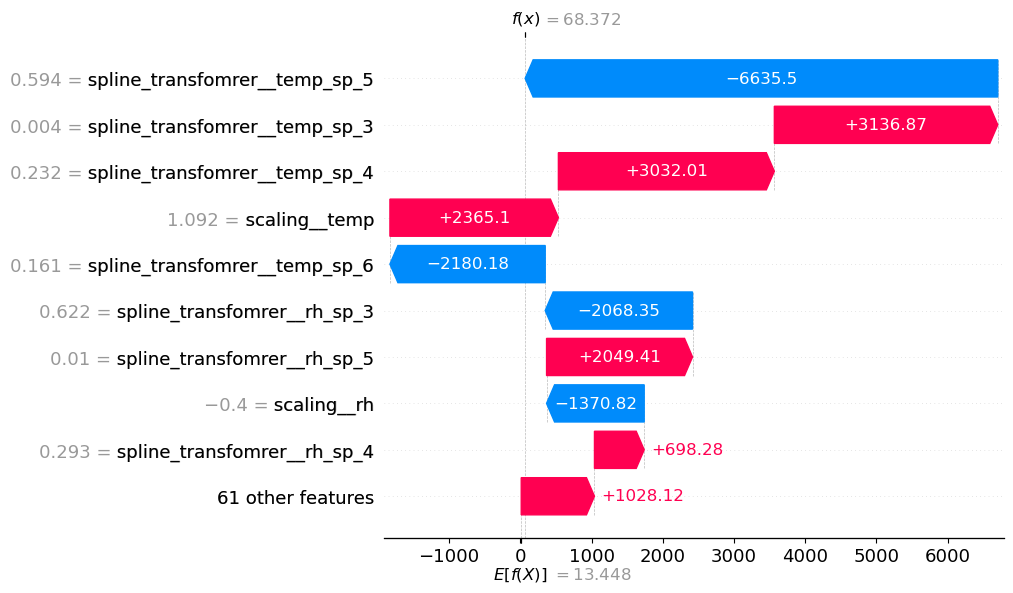

In [42]:
shap.plots.waterfall(shap_values[27])

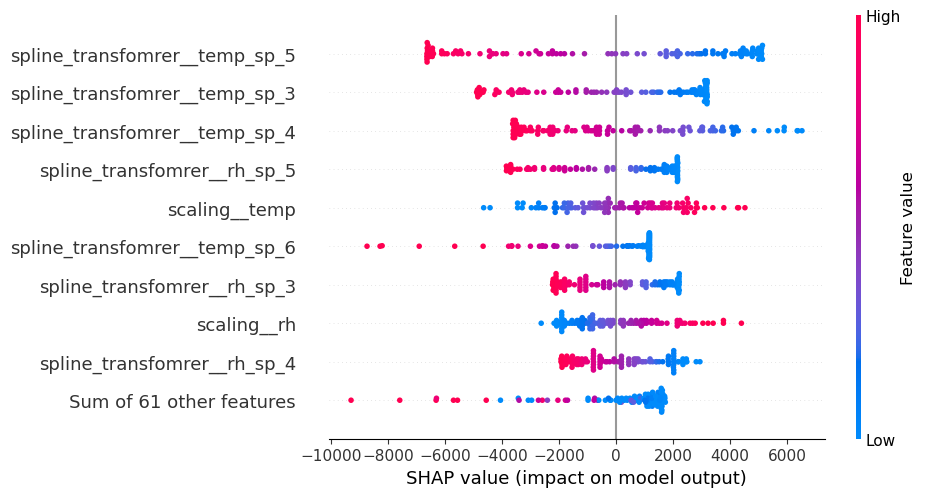

In [48]:
shap.plots.beeswarm(shap_values)

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.